In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




---

**Scenario**: A salesman has scheduled two appointments to sell software, one in the morning and another one in the afternoon. There are two software
editions available: the base edition costing Rs. 5000 and the premium edition costing Rs. 10000. His morning appointments typically lead
to a sale with a 30% chance while the afternoon ones typically lead to a sale with a 60% chance independent of what happened in the
morning. If the morning appointment ends up in sale, the salesman has a 70% chance of selling the premium edition and if the afternoon
appointment ends up in a sale, he is equally likely to sell either of the editions. Let X be the random variable representing the total Rupee
value of sales. What are the different values that X can take? Calculate the probability that X takes the value 5000?

---

In [ ]:
# Sampling space for appointment success (0 corresponds to no sale, 1 corresponds to a sale)
s_appointment = c(0, 1)

# Appointment success and failure probabilities
p_morning = 0.3 # Success probability of sales in morning
p_afternoon =  0.6# Success probability of sales in afternoon
p_appointment = matrix(nrow = 2, ncol = 2, c(1-p_morning, p_morning, 1-p_afternoon, p_afternoon), byrow = TRUE)

# Sampling space for software type
s_software = c(5000, 10000)

# Software type probabilities
p_software = matrix(nrow = 2, ncol = 2, c(0.3, 0.7, 0.5, 0.5), byrow = TRUE)

# Function that simulates one trial of the random experiment which is
# what the salesman earns on a random day
salesResult = function(){
  result = numeric(2)
  # Simulate whether sales happen in morning and afternoon appointments
  for (j in c(1:2)){
    result[j] = sample(s_appointment, size = 1, replace = TRUE, prob = p_appointment[j, ])
  }
  earnings = ifelse(result[1] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[1, ]), 0) + ifelse(result[2] == 1, sample(s_software, size = 1, replace = TRUE, prob = p_software[2, ]), 0)
  return(earnings)
}

# Number of simulations
nsimulations = 1e5
simulatedData = replicate(nsimulations, salesResult())

mean(simulatedData)
# Probability that the salesman earns Rs 5000
mean(simulatedData == 0)
mean(simulatedData == 5000)
mean(simulatedData == 10000)
mean(simulatedData == 15000)
mean(simulatedData == 20000)

# Can we calculate all the probabilities in one shot?
table(simulatedData) / nsimulations


[1] 7056.3

[1] 0.27916

[1] 0.24621

[1] 0.32122

[1] 0.09103

[1] 0.06238

simulatedData
      0    5000   10000   15000   20000 
0.27916 0.24621 0.32122 0.09103 0.06238 

---

**Discrete random variable**: Let ${\color{red}X}$  represent the total earnings from one day which is random; that is, ${\color{red}X}$ is a discrete random variable which can take the values $0, 5000, 10000, 15000, 20000.$ The associated probabilities can be calculated as:

$\begin{align*}P({\color{red}X} = 0)  &= 0.7\times0.4 = 0.28,\\ P({\color{red}X} = 5000) &= 0.3\times0.3\times0.4+0.7\times0.6\times0.5=0.246,\\ P({\color{red}X} = 10000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.4+0.7\times0.6\times0.5=0.321,\\ P({\color{red}X} = 15000) &= 0.3\times0.3\times0.6\times0.5+0.3\times0.7\times0.6\times0.5=0.09,\\ P({\color{red}X} = 20000) &= 0.3\times0.7\times0.4+0.3\times0.6\times0.5 = 0.063.\end{align*}$

---

**Probability Mass Function (PMF)** of the random variable ${\color{red}X}$ is denoted as ${\color{red}{P_X}}(x),$ where $x$ represents the possible values that the random variable ${\color{red}X}$ can take:

$\begin{align*}{\color{red}{P_X}}(0) &= P({\color{red}X} = 0)  = 0.28,\\ {\color{red}{P_X}}(5000) &=P({\color{red}X} = 5000) = 0.246,\\ {\color{red}{P_X}}(10000) &=P({\color{red}X} = 10000) = 0.321,\\ {\color{red}{P_X}}(15000) &=P({\color{red}X} = 15000) = 0.09,\\ {\color{red}{P_X}}(20000) &=P({\color{red}X} = 20000) = 0.063.\end{align*}$

---

---

Plot the frequency of occurences of all possible values of the random variable $\color{red}X$

---

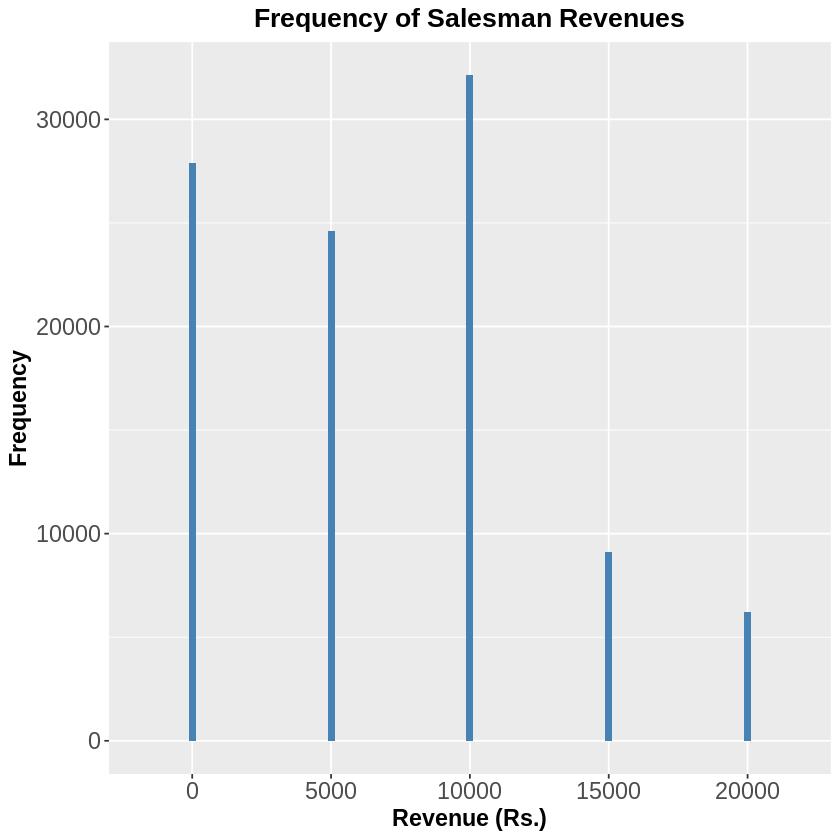

In [ ]:
# Convert simulatedData into a dataframe
dfSales = as.data.frame(simulatedData)

# Add names to the columns
colnames(dfSales) = c('Earning')

p = ggplot(data = dfSales)+
geom_bar(aes(x = factor(Earning)), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue (Rs.)',
       y = 'Frequency',
       title = 'Frequency of Salesman Revenues')
p

---

Plot the PMF of the random variable $\color{red}X$

---

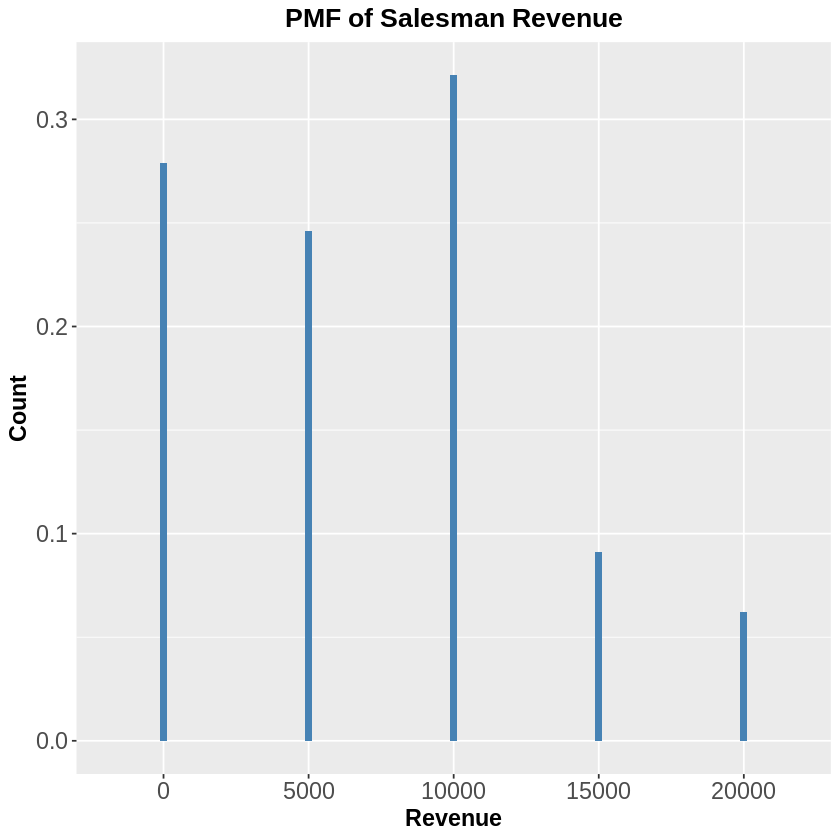

In [ ]:
# Convert table of simulatedData into a dataframe
dfSales = as.data.frame(table(simulatedData))

# Add names to the columns
colnames(dfSales) = c('Earning', 'Frequency')

# Add a new column with proportion (probability) values
dfSales['Probability'] = dfSales['Frequency'] / nsimulations

#head(dfSales, 5)

p = ggplot(data = dfSales)+
geom_col(aes(x = Earning, y = Probability), width = 0.05, fill = 'steelblue')+
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
  axis.text = element_text(size = 12),
  axis.text.x = element_text(size = 14),
  axis.text.y = element_text(size = 14),
  axis.title = element_text(size = 14, face = "bold"))+
  labs(x = 'Revenue',
       y = 'Count',
       title = 'PMF of Salesman Revenue')
p


What is the salesman's expected earnings? What does it even mean to say "expected earning?" It is a single number denoted as $E[X]$ and referred to as the *expected value of* $X$ which can be calculated as follows:


---



*   *From a simulation perspective*, it is simply an average of all the simulated earnings:
$\begin{align*}E[X] &\approx \frac{1}{\text{nsimulations}}\times\begin{cases}\text{No. of times 0 appeared}\times0\\\qquad\qquad\quad+\\\text{No. of times 5000 appeared}\times 5000\\\qquad\qquad\quad+\\\text{No. of times 10000 appeared}\times10000\\\qquad\qquad\quad+\\\text{No. of times 15000 appeared}\times15000\\\qquad\qquad\quad+\\\text{No. of times 20000 appeared}\times20000\end{cases}\\&=0\times\underbrace{\frac{\text{No. of times 0 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=0)=P_X(0)}}\\&+5000 \times\underbrace{\frac{\text{No. of times 5000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=5000) = P_X(5000)}}\\&+10000 \times\underbrace{\frac{\text{No. of times 10000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=10000) = P_X(10000)}}\\&+15000 \times\underbrace{\frac{\text{No. of times 15000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=15000)=P_X(15000)}}\\&+20000 \times\underbrace{\frac{\text{No. of times 20000 appeared}}{\text{nsimulations}}}_{\color{green}{\text{approximation to }P(X=20000)=P_X(20000)}}.\end{align*}$


---


*   *From a theoretical perspective*, the expected value of $X$ is defined as the weighted sum of the possible values $X$ can take with the corresponding probabilities as the weights:

$\begin{align*} E[X] &= \sum_xxP_X(x),\ \text{where }x = 0, 5000, 10000, 15000, 20000\\\Rightarrow E[X] &= 0\times P_X(0)+5000\times P_X(5000)+10000\times P_X(10000)+15000\times P_X(15000)+20000\times P_X(20000)\\&=0\times0.28+5000\times0.246+10000\times0.321+15000\times0.09+20000\times0.063 = \text{Rs. }7050.\end{align*}$



---

So, we see that the expected value of $X$ is approximately the long-term average of the simulated (or realized) values of $X.$


In [ ]:
# Expected earnings using simulated values
mean(simulatedData) # long term average of the realizations of X

# Expected earnings using the theoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
sum(x * p)

[1] 7056.3

[1] 7050

How much could the salesman's earnings vary from the expected value of the earning calculated in the previous cell?


---


To answer this question, let's first look at the quantity $X-E[X] = X-7050.$ Note that:


*   this is also a random variable with the possible values $0-7050, 5000-7050, 10000-7050, 15000-7050, 20000-7050$;
*   it can be thought of as the random variable that captures the deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&\color{red}{X}-\color{cyan}{E[X]} = \color{red}{X}-\color{cyan}{7050}&\color{magenta}{\text{Probability}}\\
\hline
0 & -7050& 0.28\\
5000 & -2050 & 0.246\\
10000 & 2950 & 0.321\\
15000 & 7950 & 0.09\\
20000 0& 12950 & 0.063
\end{array}
---
Now, consider the quantity $(X-E[X])^2 = (X-7050)^2.$ Note that:


*   this is also a random variable with the possible values $(0-7050)^2, (5000-7050)^2, (10000-7050)^2, (15000-7050)^2, (20000-7050)^2$;
*   it can be thought of as the random variable that captures the squared deviation of $X$ from its expected value;
*  the associated probabilities are still the same as:
\begin{array}{c|c|c}
\hline
\color{red}X&(\color{red}{X}-\color{cyan}{E[X]})^2 = (\color{red}{X}-\color{cyan}{7050})^2&\color{magenta}{\text{Probability}}\\
\hline
0 & (-7050)^2 & 0.28\\
5000 & (-2050)^2 & 0.246\\
10000 & (2950)^2 & 0.321\\
15000 & (7950)^2& 0.09\\
20000 & (12950)^2 & 0.063
\end{array}

---

$\color{green}{Variance}$ of the random variable $X,$ denoted as $\text{var}[X],$ is the expected squared deviation of $X$ from its expected value. In simple terms, variance of $X$ is the expected value of the random variable $(X-E[X])^2.$

$\begin{align*}\text{Var}[X] &= E\left[\underbrace{(X-E[X])^2}_{\text{squared deviation random variable}}\right]\\&=
\sum_x (x-E[X])^2\times P_X(x)\\& = (0-7050)^2\times P_X(0)+(5000-7050)^2\times P_X(5000)+(10000-7050)^2\times P_X(10000)+(15000-7050)^2\times P_X(15000)+(20000-7050)^2\times P_X(20000)\\&=(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063\\&=309375\ \text{Rupees squared}.\end{align*}$

---

$\color{green}{Standard\ deviation}$ of the random variable $X,$ denoted as $\text{SD}[X],$ is defined as the square root of its variance:

$\begin{align*}\text{SD}[X] &= \sqrt{\text{Var}[X]} = \sqrt{E\left[(X-E[X])^2\right]}\\&=\sqrt{(0-7050)^2\times 0.28+(5000-7050)^2\times 0.246+(10000-7050)^2\times 0.321+(15000-7050)^2\times 0.09+(20000-7050)^2\times 0.063}\\&\approx \text{Rs. 5830.7}.\end{align*}$

---

In [ ]:
# Variance of the earnings using simulated values
# Long term average of this random variable (X-E[X])^2
#simulatedData - mean(simulatedData) # simulated deviations
#(simulatedData - mean(simulatedData))^2 # simulated squared deviations
mean(simulatedData)
mean((simulatedData - mean(simulatedData))^2) # variance calculated using simulation
var(simulatedData) # in-built function for variance

# Standard deviation of the earnings using simulated values
sqrt(mean((simulatedData - mean(simulatedData))^2))
sd(simulatedData) # in-built function for standard deviation

print(' ')

# Variance of the earnings using the thoretical definition
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)
sum((x - sum(x*p))^2 * p)

# Standard deviation of the earnings using the theoretical definition
sqrt(sum((x - sum(x*p))^2 * p))

[1] 7056.3

[1] 33919630

[1] 33919970

[1] 5824.056

[1] 5824.085

[1] " "


[1] 33997500

[1] 5830.738

In [ ]:
x = c(0, 5000, 10000, 15000, 20000)
p = c(0.28, 0.246, 0.321, 0.09, 0.063)

# Deviations from the expected value
x - sum(x*p)

# Squared deviations from the expected value
(x - sum(x*p))^2

# Expected value of the squared deviations from the expected value
sum((x - sum(x*p))^2 * p)

# Square root of the expected value of the squared deviations from the
# expected value
sqrt(sum((x - sum(x*p))^2 * p))

[1] -7050 -2050  2950  7950 12950

[1]  49702500   4202500   8702500  63202500 167702500

[1] 33997500

[1] 5830.738